<a href="https://colab.research.google.com/github/rafaelfaustini/machinelearning-python/blob/master/breast_cancer_ml_fullkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
labels = ['ID','ClumpThickness', 'UniformityofCellSize', 'UniformityofCellShape', 'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei', 'BlandChromatin', 'NormalNucleoli', 'Mitoses', 'Class']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', 
                 names=labels, header=None)

# Limpeza de caracteres não numéricos
cols = df.columns[df.dtypes.eq('object')] # Checa valores que não são int e sim object (strings) e cria uma lista
for col in cols:
  df[col] = pd.to_numeric(df[col], errors='coerce') # Percorro cada um object e transformo em numérico, caso não seja numérico o campo fica com NaN
df = df.dropna() # Exclui as linhas com NaN


In [ ]:
x= df.loc[:, 'ClumpThickness':'Mitoses']



In [ ]:
y= df.loc[:, 'Class':'Class']
print(y.head())
# 2 câncer benigno -> 0
# 4 câncer maligno -> 1
y = y.replace(to_replace=2, value=0)
y = y.replace(to_replace=4, value=1)
#print(y)

   Class
0      2
1      2
2      2
3      2
4      2


In [114]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

classificador = Sequential()
classificador.add(Dropout(0.73, input_shape=(9,)) )
classificador.add(Dense(units=5, activation= 'relu', 
                        kernel_initializer='random_uniform', input_dim = 9)) # Units: Formula usada (entradas+saida)/2 -> (10+1)/2 -> 5.5 ~= 6 | Input_Dim: Número de previsores de entrada
classificador.add(Dense(units=1, activation= 'sigmoid'))

In [115]:
classificador.compile(optimizer= 'adam', loss='binary_crossentropy',
                      metrics = ['binary_accuracy'])
h = classificador.fit(x, y, validation_split=0.33, batch_size=10, epochs=150, verbose=0) # batch_size:calcula de 10, calcula os pesos, calcula mais 10 e calcula os pesos.... Validation split separa o que vai ser para teste o que vai para treino

In [116]:
print(h.history.keys())

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


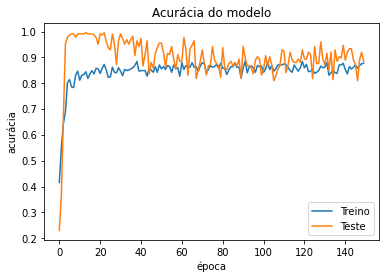

In [117]:
import matplotlib.pyplot as plt
plt.plot(h.history['binary_accuracy'])
plt.plot(h.history['val_binary_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['Treino', 'Teste'], loc='lower right')
plt.show()

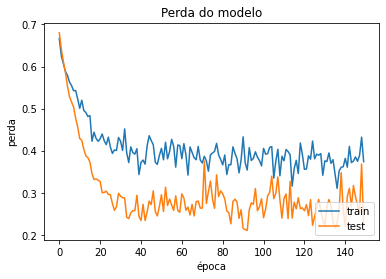

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['train', 'test'], loc='lower right')
plt.show()